# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The participation rate of ACT has decreased from year 2017 to 2018, in contrast to SAT which increases from year 2017 to 2018. In order to boost it's market share in the various states, what strategies can be implemented to encourage the graduates to take the ACT college admission test?

## Executive Summary

The objective of this report is to describe and infer our study of the two main standardized test used for college admission in the United States and recommend how the college board might increase participation amongst the graduating student in the state.

The study included a detailed look at the aggregate scores and participation rate of each standardized test, ACT and SAT for year 2017 and 2018.

It has been observed the participation rate is greatly influenced by the state decisions to make either one of the standardized test a mandatory for high school graduates. By standardizing on one test, it is proven that the graduates score is much constant as students are more prepared for the test. In one of the analysis, the drop in mean and median score for SAT 2017 and SAT 2018 compared to ACT score shows that the sudden change in test (e.g. from ACT to SAT) impacted the graduate's total score. It might be due to the fact the state student has been following the specific test syllabus since they joined the school hence a change in test might be disadvantage to them as the subject and test framework might be different.

In order to increase the participation rates, the college board can consider incorporate both of the subject and test framework into the school syllabus itself so that graduates can be familiarize with the both test. With that they can allow the graduates to choose which test (or both) they are more comfortable or confident in, instead of restricting them to a mandatory one. In addition by eliminating barriers to the test, like subsidizing the test cost and offering the graduates greater flexibility to take the exams on weekdays and weekends, graduates that are less fortunate will be able to participate in any of the test.


### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

SAT - there are 5 columns namely State, Participation, Evidence-Based Reading and Writing, Math and	Total

ACT - there are 7 columns namely Sate, Participation, English, Math, Reading, Science and Composite

#### 4a. Does the data look complete? 

In SAT there is a missing row on national data 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

The SAT is scored on a scale of 400-1600

The ACT will be scored on a scale of 1-36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# Fix the error values the respective correct value

act_2017.loc[21,'Science'] = 23.2
act_2017.loc[51,'Composite'] = 20.2
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
# Fix the error values the respective correct value

sat_2017.loc[20,'Math'] = 524
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
# Display data types

sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

ACT: The Composite and Participation data type should'nt be an object, it should be float type

SAT: The Participation data type should'nt be an object


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:

def convert_float(x):
    
    """
    Convert the percentage string to a float percentage
    - remove % symbol
    - divide by 100 to make decimal 
    
    """
    
    new = x.replace('%','')
    return float(new)/100

# Apply function to act_2017 "Participation"
act_2017["Participation"] = act_2017["Participation"].apply(convert_float)

# Apply function to sat_2017 "Participation"
sat_2017["Participation"] = sat_2017["Participation"].apply(convert_float)



In [10]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
# Change "Composite" data type to float

act_2017["Composite"] = act_2017["Composite"].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [12]:
# Check the data types

sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [13]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [14]:
# changing both the act_2017 and sat_2017 column names to lowercase

sat_2017.columns = sat_2017.columns.str.lower()
act_2017.columns = act_2017.columns.str.lower()

In [15]:
# Renaming the columns to differentiate sat_2017 and act_2017

sat_2017.columns = ['state','sat_part','sat_ebrw','sat_math','sat_total']
act_2017.columns = ['state','act_part','act_eng','act_math','act_read','act_sci','act_comp']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**



|Feature|Type|Dataset|Description|
|:---|:---|---|:---|
|**state**|*object*|ACT 2017|The states in the United States of America
|**act_part**|*float*|ACT 2017|The percent of the graduates tested (units percent to two decimal places 0.98 means 98%)
|**act_eng**|*float*|ACT 2017|The average score of the language on a scale of 1-36
|**act_math**|*float*|ACT 2017|The average score of the language on a scale of 1-36
|**act_read**|*float*|ACT 2017|The average score of the language on a scale of 1-36 
|**act_sci**|*float*|ACT 2017|The average score of the language on a scale of 1-36
|**act_comp**|*float*|ACT 2017|The average composite score of all the language on a scale of 1-36
|**sat_part**|*float*|SAT 2017|The percent of the graduates tested (units percent to two decimal places 0.98 means 98%)
|**sat_ebrw**|*int*|SAT 2017|The score of evidence-based reading and writing on a scale of 200-800 
|**sat_math**|*int*|SAT 2017|The score of math on a scale of 200-800 
|**sat_total**|*int*|SAT 2017|The total score of all the languages on a scale of 400-1600
|**act18_part**|*float*|ACT 2018|The percent of the graduates tested (units percent to two decimal places 0.98 means 98%)
|**act18_eng**|*float*|ACT 2018|The average score of the language on a scale of 1-36
|**act18_math**|*float*|ACT 2018|The average score of the language on a scale of 1-36
|**act18_read**|*float*|ACT 2018|The average score of the language on a scale of 1-36
|**act18_sci**|*float*|ACT 2018|The average score of the language on a scale of 1-36
|**act18_comp**|*float*|ACT 2018|The average composite score of all the language on a scale of 1-36
|**sat_part**|*float*|SAT 2018|The percent of the graduates tested (units percent to two decimal places 0.98 means 98%)
|**sat_ebrw**|*int*|SAT 2018|The score of evidence-based reading and writing on a scale of 200-800 
|**sat_math**|*int*|SAT 2018|The score of math on a scale of 200-800 
|**sat_total**|*int*|SAT 2018|The total score of all the languages on a scale of 400-1600

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [16]:
act_2017.head()

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [17]:
# dropped the "national" role

act_2017.drop(0,inplace=True)

In [18]:
act_2017.head()

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
# Merge act_2017 with sat_2017

admission_test = pd.merge(act_2017,sat_2017,on='state')

In [20]:
admission_test.head()

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,sat_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [21]:
admission_test.to_csv('data/admission_test.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
# import sat_2018 and act_2018 csv file

sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018_updated.csv')

In [23]:
"""
use existing define function convert_float
- remove % symbol
- divide by 100
"""   
# apply function to act_2018 participation

sat_2018["Participation"] = sat_2018["Participation"].apply(convert_float)

In [24]:
# Convert sat_2018 columns name to lower case

sat_2018.columns = sat_2018.columns.str.lower()

In [25]:
# Rename sat_2018 columns

sat_2018.columns = ['state','sat18_part','sat18_ebrw','sat18_math','sat18_total']

In [26]:
# check dtypes

sat_2018.dtypes

state           object
sat18_part     float64
sat18_ebrw       int64
sat18_math       int64
sat18_total      int64
dtype: object

In [27]:
# check dtypes 
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [28]:
# Convert act_2018 columns name to lower case

act_2018.columns = act_2018.columns.str.lower()

In [29]:
# Rename act_2018 columns

act_2018.columns = ['state','act18_part','act18_eng','act18_math','act18_read','act18_sci','act18_comp']

In [30]:
# change dtypes from int to float

act_2018['act18_part'] = act_2018.act18_part.apply(lambda x: float(x/100))

In [31]:
# check dtypes

act_2018.dtypes

state          object
act18_part    float64
act18_eng     float64
act18_math    float64
act18_read    float64
act18_sci     float64
act18_comp    float64
dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
# Merge act_2018 and sat_2018 as admission_test2018

admission_test2018 = pd.merge(act_2018,sat_2018,on='state')

In [33]:
# Merge admission_test and admission_test2018

final = pd.merge(admission_test,admission_test2018,on='state')

In [34]:
# Save merged dataframe

final.to_csv('data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [35]:
final.describe()

,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,sat_total,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [36]:
# standard deviation

def stddev(data):
    mu = final[data].mean()
    summation = sum([(i-mu)**2 for i in data])
    average = summation/len(data)
    std = average**0.5

    return std

In [37]:
# sample standard deviation

def stddev_sample(data):
    mu = (sum(data))/(len(data))
    summation = sum([(i-mu)**2 for i in data])
    average = summation/(len(data)-1)
    std = average**0.5

    return std

In [38]:
final.agg([stddev_sample])

,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,sat_total,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
stddev_sample,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812,0.34081,2.106278,2.446356,2.035765,2.167245,1.870114,0.373143,47.502627,47.772623,94.155083


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [39]:
{data: stddev_sample(final[data]) for data in final._get_numeric_data().columns}

{'act_part': 0.32140842015886834,
 'act_eng': 2.35367713980303,
 'act_math': 1.9819894936505533,
 'act_read': 2.0672706264873146,
 'act_sci': 1.7393530462812443,
 'act_comp': 2.020694891154341,
 'sat_part': 0.35276632270013036,
 'sat_ebrw': 45.66690138768932,
 'sat_math': 47.12139516560329,
 'sat_total': 92.49481172519046,
 'act18_part': 0.3408097623567245,
 'act18_eng': 2.1062781969951776,
 'act18_math': 2.4463562339793055,
 'act18_read': 2.035764538177723,
 'act18_sci': 2.1672445684804105,
 'act18_comp': 1.8701137639716146,
 'sat18_part': 0.37314256330391965,
 'sat18_ebrw': 47.50262737831599,
 'sat18_math': 47.77262322095955,
 'sat18_total': 94.15508275097599}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [40]:
# Using numpy std method to test on act_part

std_error = np.std(final,ddof=1)
std_error

act_part        0.321408
act_eng         2.353677
act_math        1.981989
act_read        2.067271
act_sci         1.739353
act_comp        2.020695
sat_part        0.352766
sat_ebrw       45.666901
sat_math       47.121395
sat_total      92.494812
act18_part      0.340810
act18_eng       2.106278
act18_math      2.446356
act18_read      2.035765
act18_sci       2.167245
act18_comp      1.870114
sat18_part      0.373143
sat18_ebrw     47.502627
sat18_math     47.772623
sat18_total    94.155083
dtype: float64

**ANS**: Yes, the manually calculated standard deviations and numpy's method does match.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [41]:
# states with highest participation rate for 2017 SAT

final.sort_values(['sat_part'], ascending=False).head()

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,...,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,0.32,23.6,23.7,22.7,24.4,23.0,0.92,497,480,977
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,0.22,24.4,24.5,23.9,24.7,23.9,1.00,511,499,1011
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,0.26,25.6,26.0,24.8,26.1,24.9,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.2,23.7,23.1,24.5,23.4,1.00,505,492,998
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,0.16,25.1,25.1,24.7,25.6,24.4,0.96,535,528,1063


In [42]:
# States where both 2017 and 2018 100% participation for ACT

final[(final['act_part'] == 1) & (final['act18_part'] == 1)]

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,...,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.0,19.1,18.9,18.3,19.6,19.0,0.06,595,571,1166
3,Arkansas,1.0,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.0,19.4,19.1,18.9,19.7,19.4,0.05,592,576,1169
17,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,...,1.0,20.2,19.9,19.7,20.8,20.1,0.04,630,618,1248
18,Louisiana,1.0,19.4,18.8,19.8,19.6,19.5,0.04,611,586,...,1.0,19.2,19.0,18.5,19.6,19.1,0.04,615,595,1210
24,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,1.0,18.6,18.2,18.1,18.9,18.6,0.03,630,606,1236
25,Missouri,1.0,19.8,19.9,20.8,20.5,20.4,0.03,640,631,...,1.0,20.0,19.5,19.7,20.5,20.0,0.04,633,629,1262
26,Montana,1.0,19.0,20.2,21.0,20.5,20.3,0.10,605,591,...,1.0,20.0,18.7,19.9,20.7,20.0,0.10,606,592,1198
28,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,...,1.0,17.7,16.6,17.8,18.0,17.9,0.23,574,566,1140
33,North Carolina,1.0,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,1.0,19.1,18.0,19.3,19.5,19.2,0.52,554,543,1098
36,Oklahoma,1.0,18.5,18.8,20.1,19.6,19.4,0.07,530,517,...,1.0,19.3,18.4,18.8,20.1,19.4,0.08,541,521,1062


In [43]:
# States where both 2017 and 2018 100% participation for SAT 

final[(final['sat_part'] == 1) & (final['sat18_part'] == 1)]

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,...,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.0,530,512,...,0.26,25.6,26.0,24.8,26.1,24.9,1.0,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.0,503,492,...,0.17,23.2,23.7,23.1,24.5,23.4,1.0,505,492,998
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.0,509,495,...,0.22,24.4,24.5,23.9,24.7,23.9,1.0,511,499,1011


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

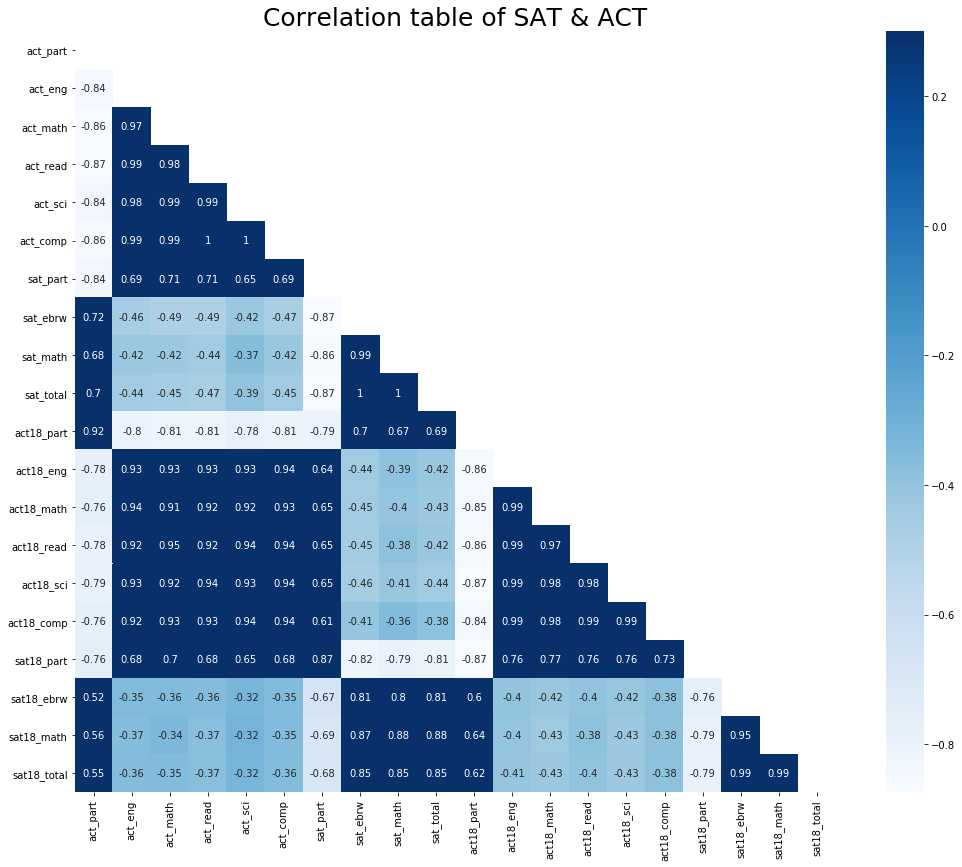

In [44]:
fig,ax = plt.subplots(figsize=(18,14))

# Set the title.
ax.set_title('Correlation table of SAT & ACT', fontsize=25, y=1);

# Masking
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(final.corr(), mask=mask, vmax=.3, square=True, annot = True, cmap='Blues')

### Inference

There is a high negative correlation between the SAT participation and ACT participation for both 2017 and 2018

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [45]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 16)) # grid of subplots
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins = 10,edgecolor='k')
        ax[i].set_title(f'{list_of_titles[i]}',fontsize=15, pad=10)
        ax[i].set_xlabel(f'{list_of_xlabels[i]}',fontsize=12)
        ax[i].set_ylabel('frequency',fontsize=12)
        ax[i].axvline(dataframe[column].mean(), color='r', linestyle='dashed', linewidth=1)
        ax[i].axvline(dataframe[column].median(), color='b', linestyle='dashed', linewidth=1)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [46]:
final.head()

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,...,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540,536,1076


#### Participation rates for SAT & ACT

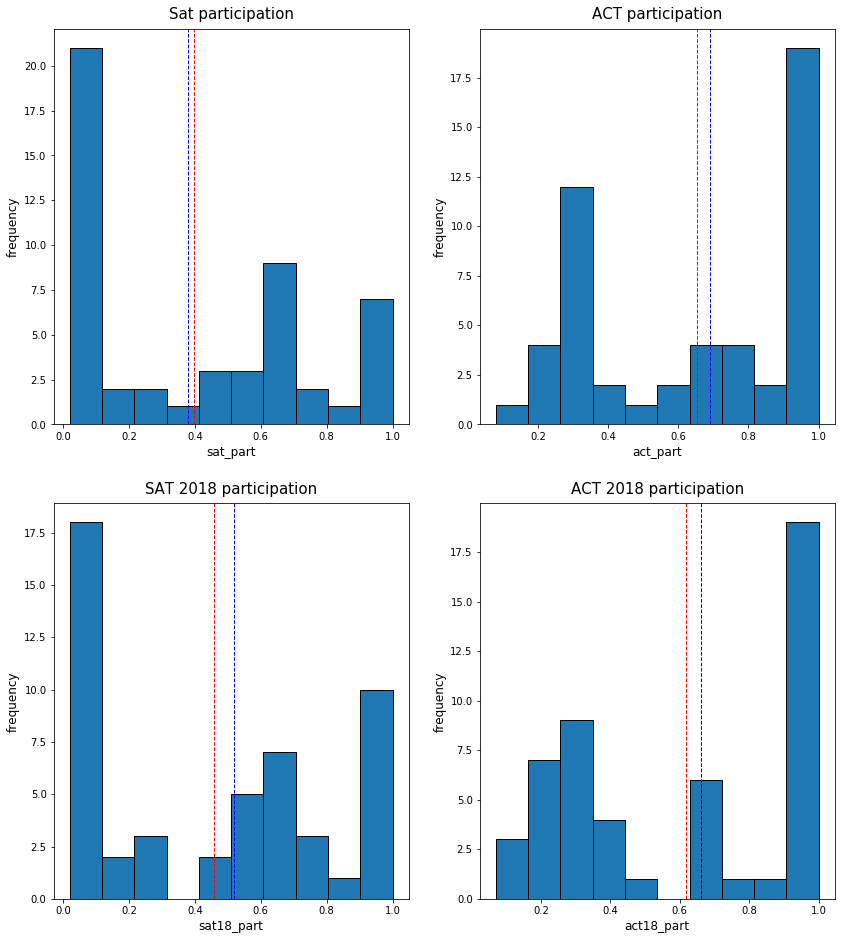

In [47]:
subplot_histograms(final,['sat_part','act_part','sat18_part','act18_part'],['Sat participation','ACT participation','SAT 2018 participation','ACT 2018 participation'],['sat_part','act_part','sat18_part','act18_part'])

#### Math scores for SAT & ACT

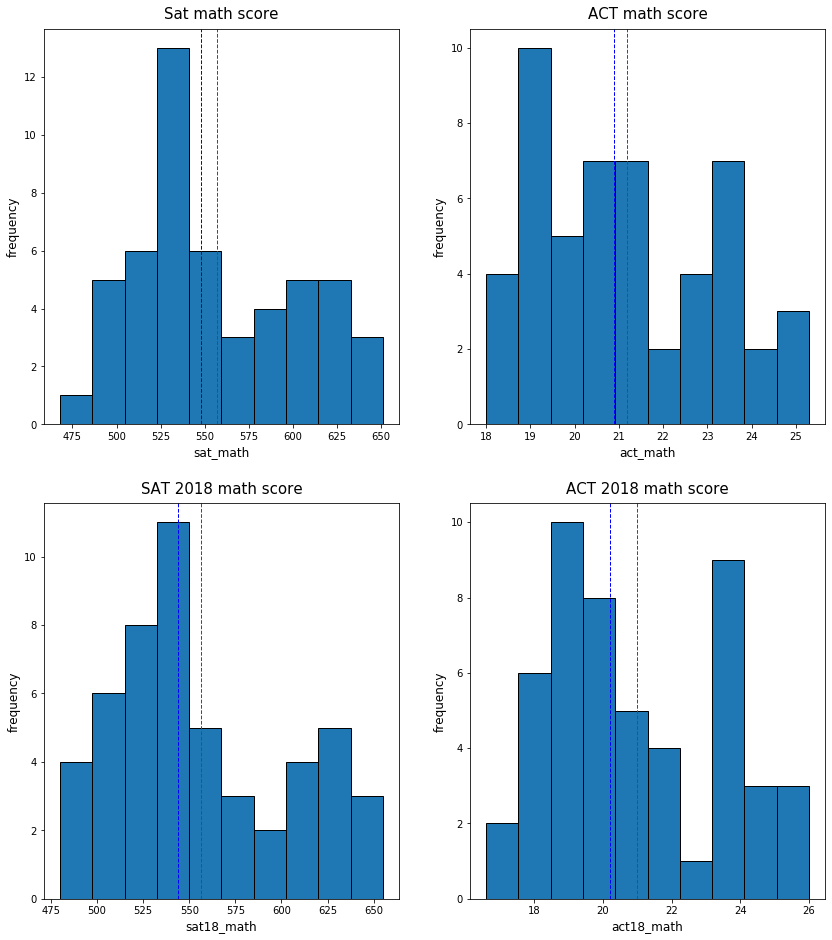

In [48]:
subplot_histograms(final,['sat_math','act_math','sat18_math','act18_math'],['Sat math score','ACT math score','SAT 2018 math score','ACT 2018 math score'],['sat_math','act_math','sat18_math','act18_math'])

In [49]:
final.head()

,state,act_part,act_eng,act_math,act_read,act_sci,act_comp,sat_part,sat_ebrw,sat_math,...,act18_part,act18_eng,act18_math,act18_read,act18_sci,act18_comp,sat18_part,sat18_ebrw,sat18_math,sat18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540,536,1076


#### Reading/verbal scores for SAT & ACT

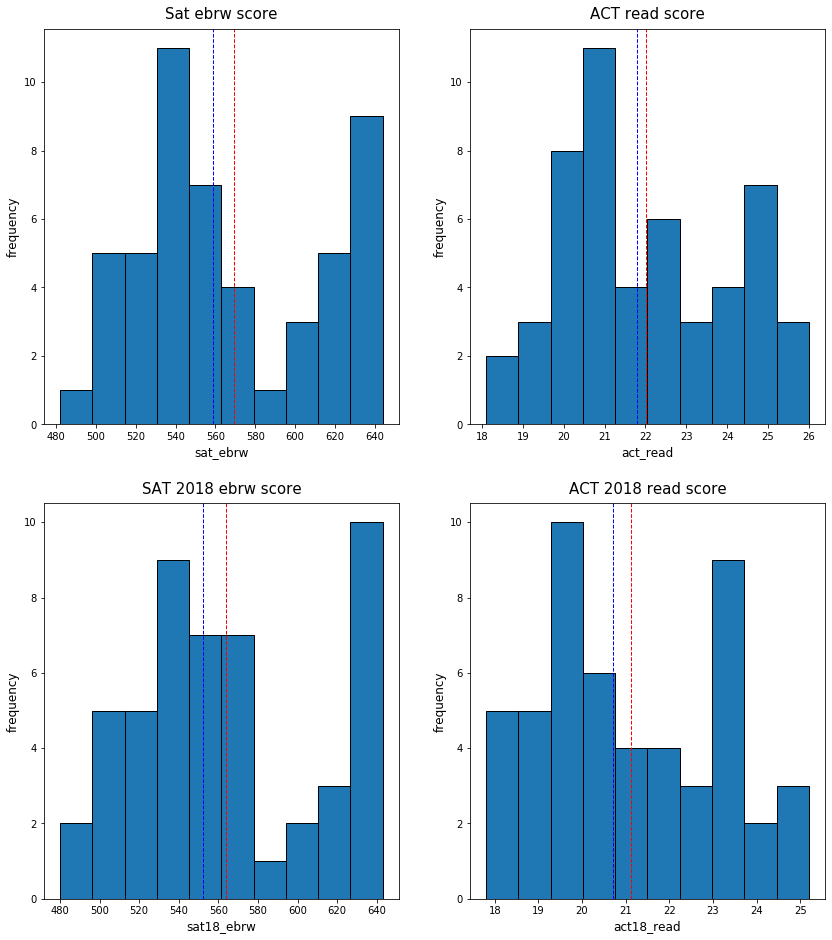

In [50]:
subplot_histograms(final,['sat_ebrw','act_read','sat18_ebrw','act18_read'],['Sat ebrw score','ACT read score','SAT 2018 ebrw score','ACT 2018 read score'],['sat_ebrw','act_read','sat18_ebrw','act18_read'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [70]:
def scatter_plot(dataframe, x_axis, y_axis):
    
    # Establish the size of the figure.
    fig, ax = plt.subplots(figsize=(20, 9))

    # Create scatter plot 
    plt.scatter(dataframe[f'{x_axis}'],
                dataframe[f'{y_axis}'],color=['midnightblue'],alpha=0.8);
    
    # title, xlabel and y label
    plt.title(f"{x_axis} versus {y_axis}", fontsize = 20, pad=10)
    plt.ylabel(f"{y_axis}", fontsize = 15)
    plt.xlabel(f"{x_axis}", fontsize = 15);
    
    # removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
    

#### SAT vs. ACT math scores for 2017

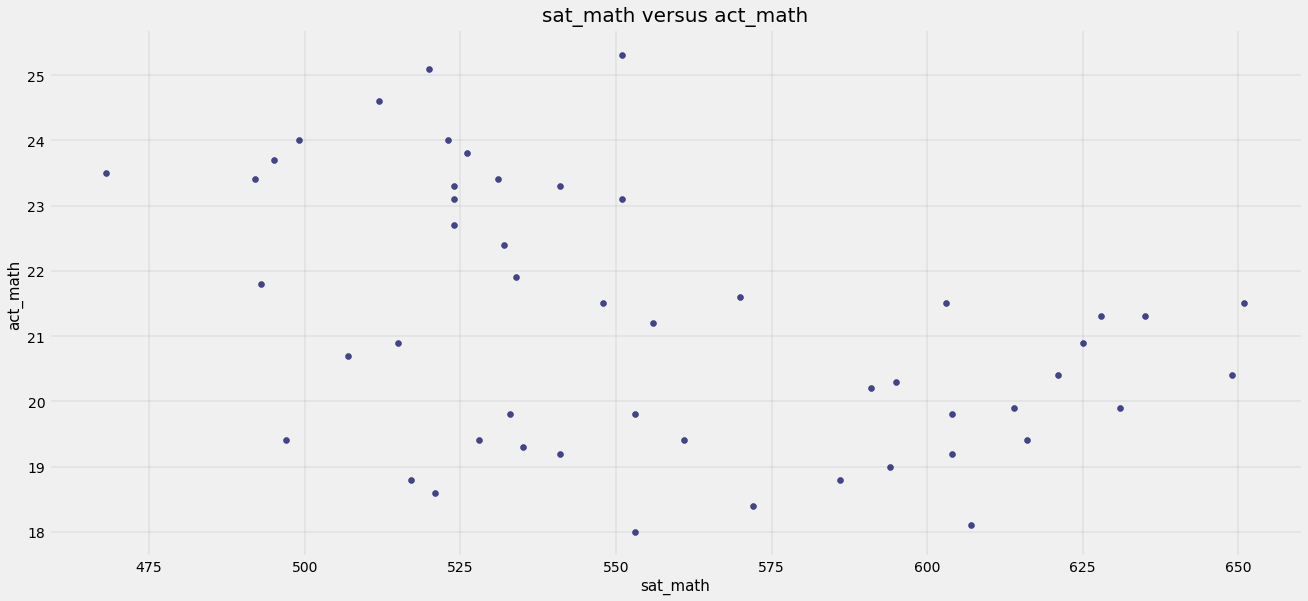

In [71]:
scatter_plot(final,'sat_math','act_math')

#### SAT vs. ACT verbal/reading scores for 2017

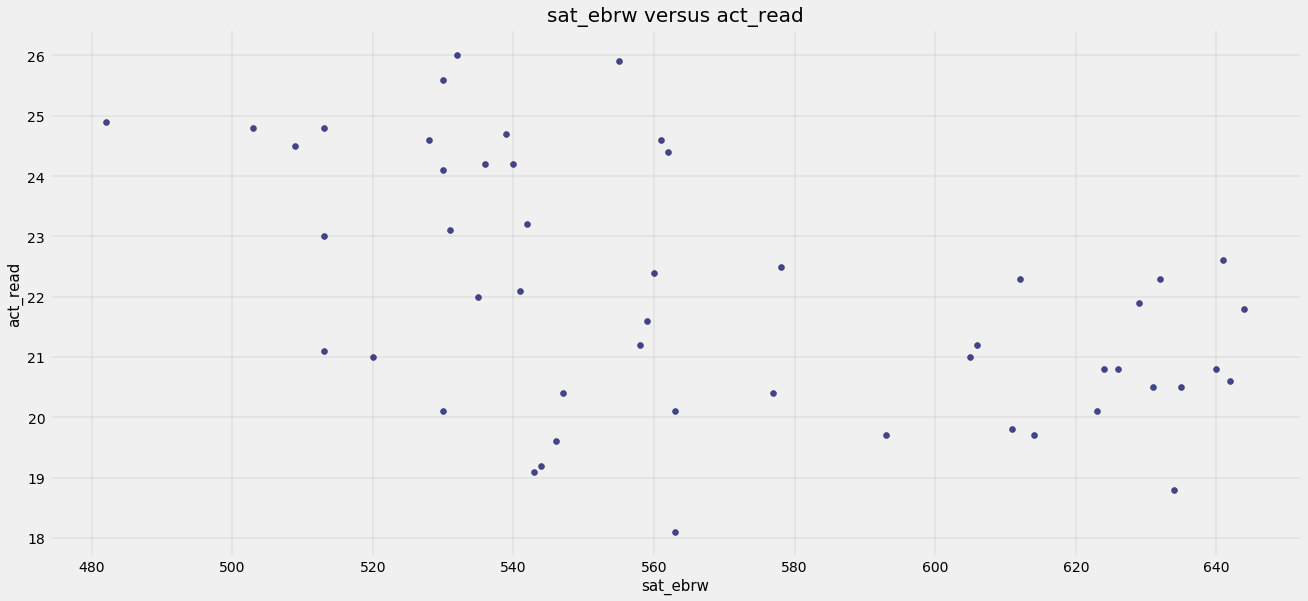

In [72]:
scatter_plot(final,'sat_ebrw','act_read')

#### SAT vs. ACT total/composite scores for 2017

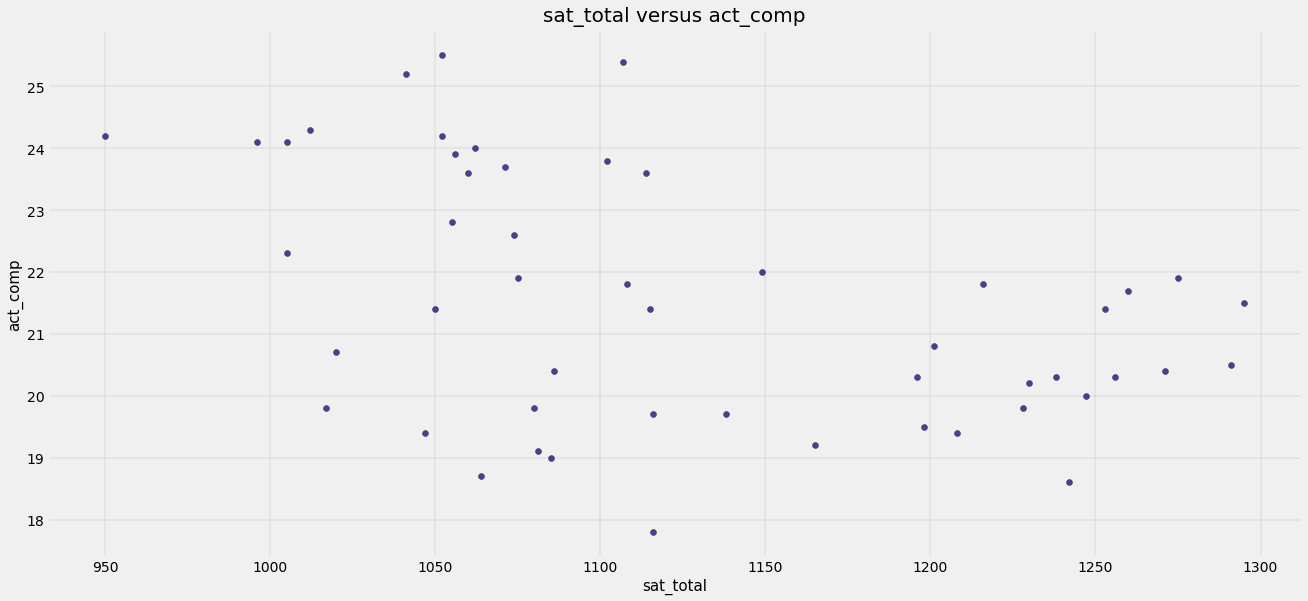

In [73]:
scatter_plot(final,'sat_total','act_comp')

#### Total scores for SAT 2017 vs. 2018

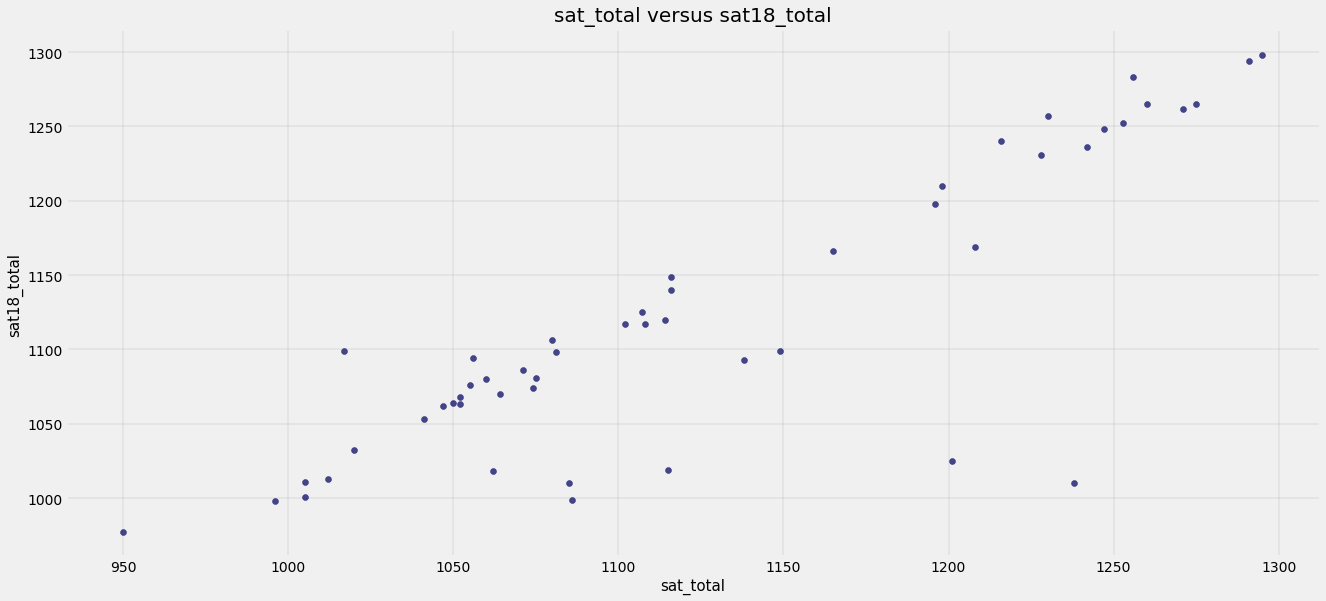

In [74]:
scatter_plot(final,'sat_total','sat18_total')

#### Composite scores for ACT 2017 vs. 2018

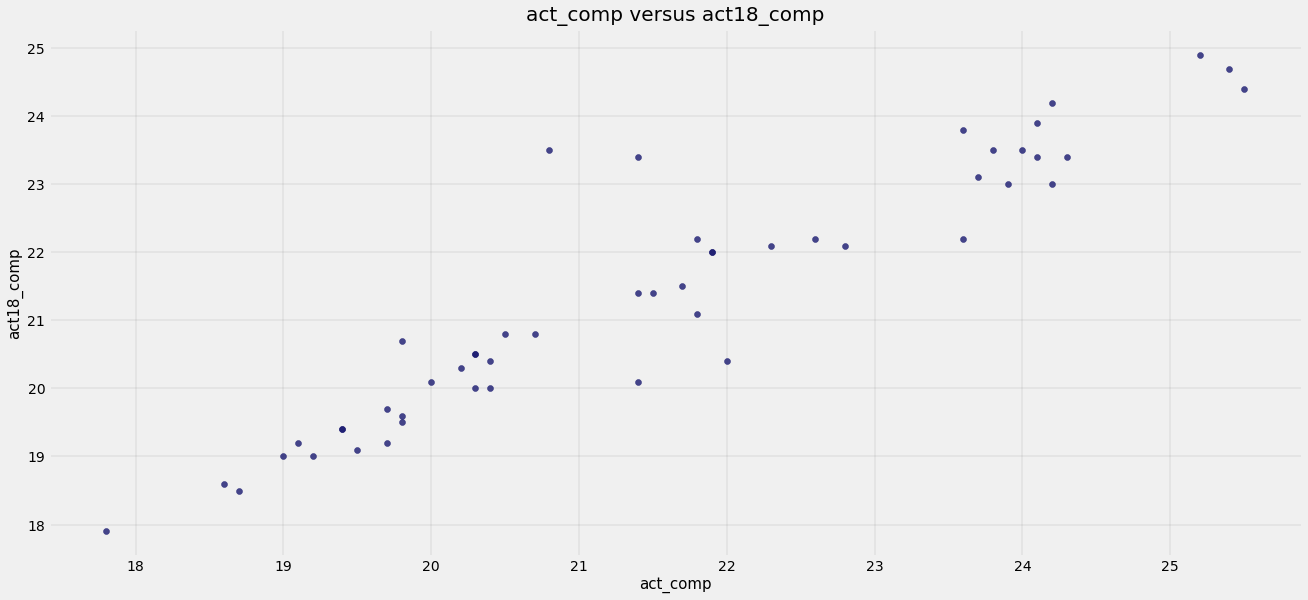

In [75]:
scatter_plot(final,'act_comp','act18_comp')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

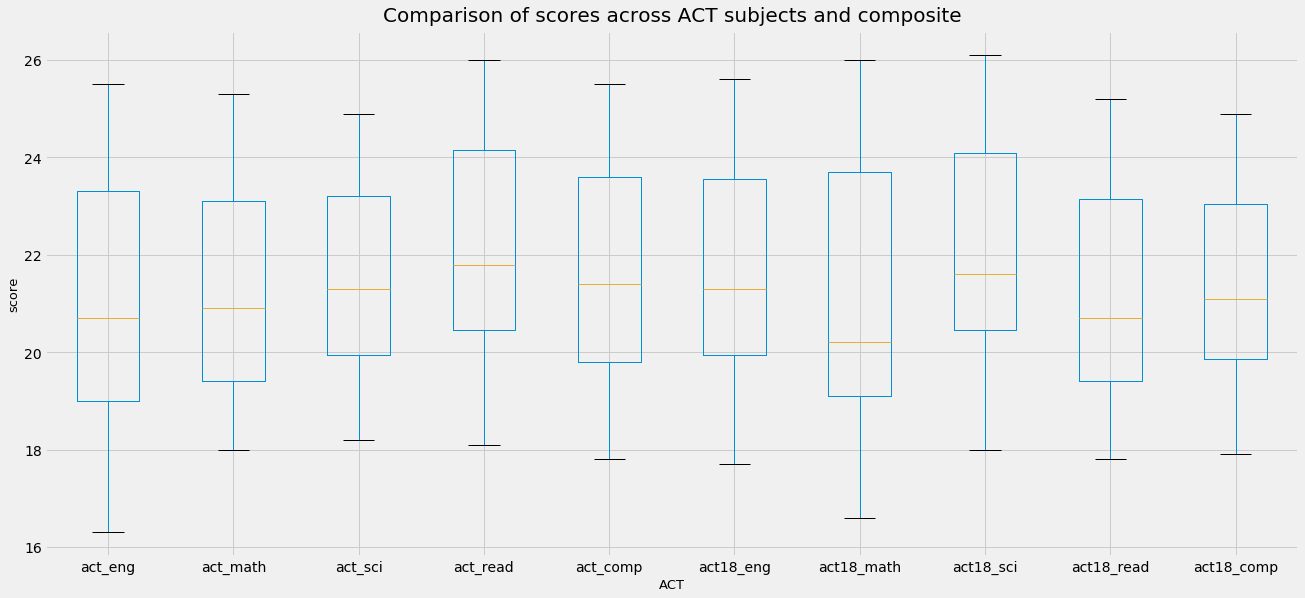

In [76]:
#plt.figure(figsize=(15, 9))

fig, ax = plt.subplots(figsize=(20, 9))

plt.title('Comparison of scores across ACT subjects and composite',fontsize=20,pad=10)
plt.xlabel('ACT',fontsize=13)
plt.ylabel('score',fontsize=13)

final.boxplot(column = ['act_eng','act_math','act_sci','act_read','act_comp','act18_eng','act18_math','act18_sci','act18_read','act18_comp']);

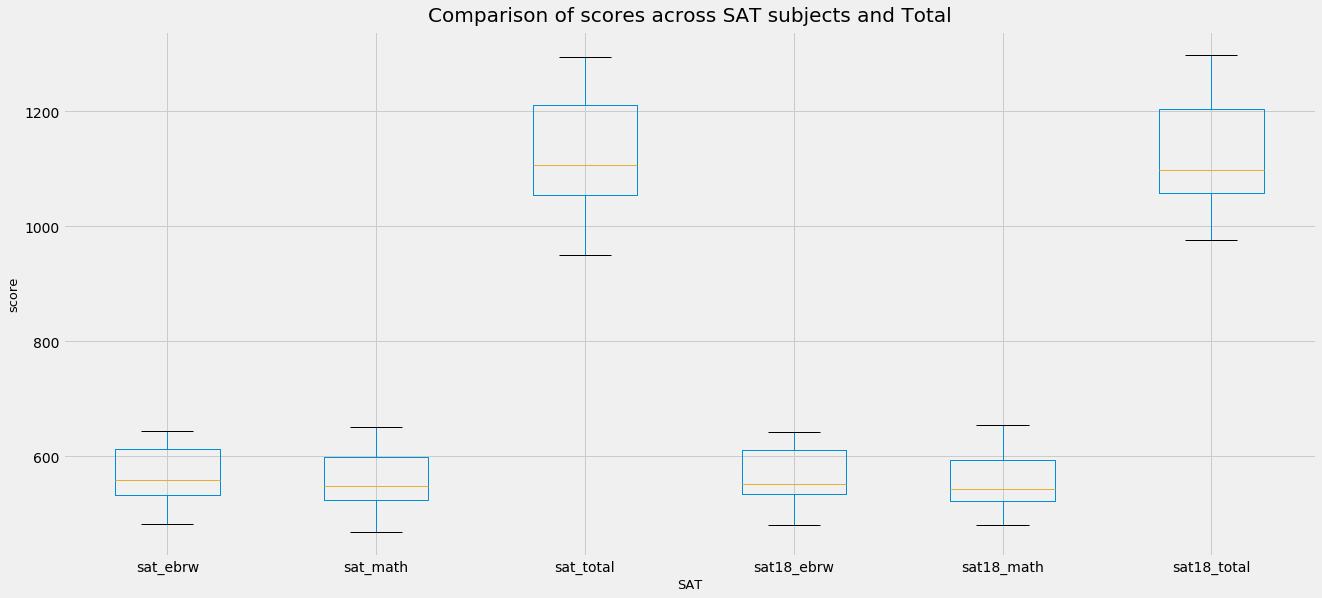

In [78]:
#plt.figure(figsize=(15, 9))

fig, ax = plt.subplots(figsize=(20, 9))

plt.title('Comparison of scores across SAT subjects and Total',fontsize=20,pad=10)
plt.xlabel('SAT',fontsize=13)
plt.ylabel('score',fontsize=13)

final.boxplot(column = ['sat_ebrw','sat_math','sat_total','sat18_ebrw','sat18_math','sat18_total']);

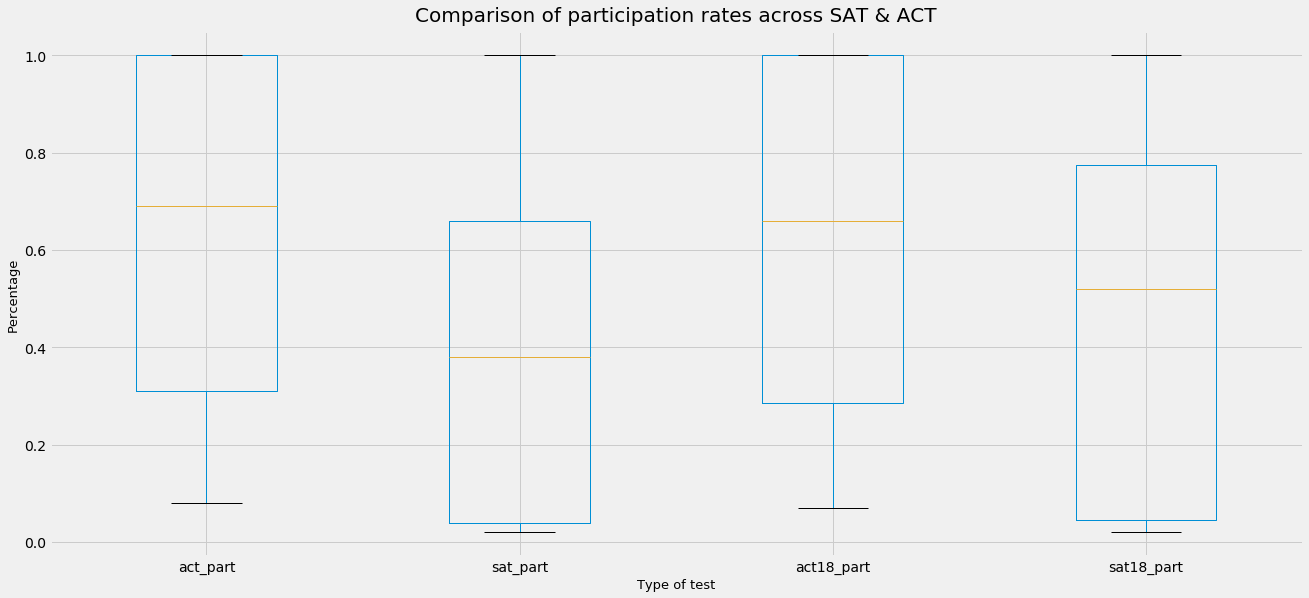

In [79]:
#plt.figure(figsize=(15, 9))

fig, ax = plt.subplots(figsize=(20, 9))

plt.title('Comparison of participation rates across SAT & ACT',fontsize=20,pad=10)
plt.xlabel('Type of test',fontsize=13)
plt.ylabel('Percentage',fontsize=13)

final.boxplot(column = ['act_part','sat_part','act18_part','sat18_part']);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

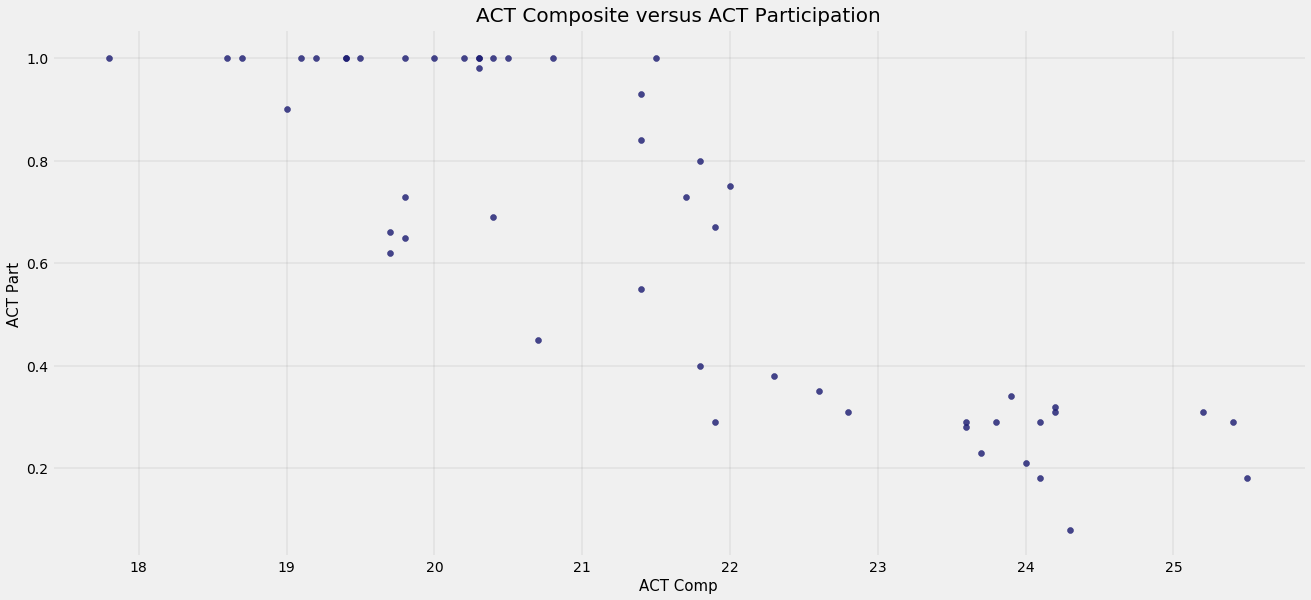

In [80]:
    fig, ax = plt.subplots(figsize=(20, 9))

    # Create scatter plot 
    plt.scatter(final['act_comp'],
                final['act_part'],color=['midnightblue'],alpha=0.8);
    
    # title, xlabel and y label
    plt.title('ACT Composite versus ACT Participation', fontsize = 20, pad=10)
    plt.ylabel('ACT Part', fontsize = 15)
    plt.xlabel('ACT Comp', fontsize = 15);
    
    # removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)

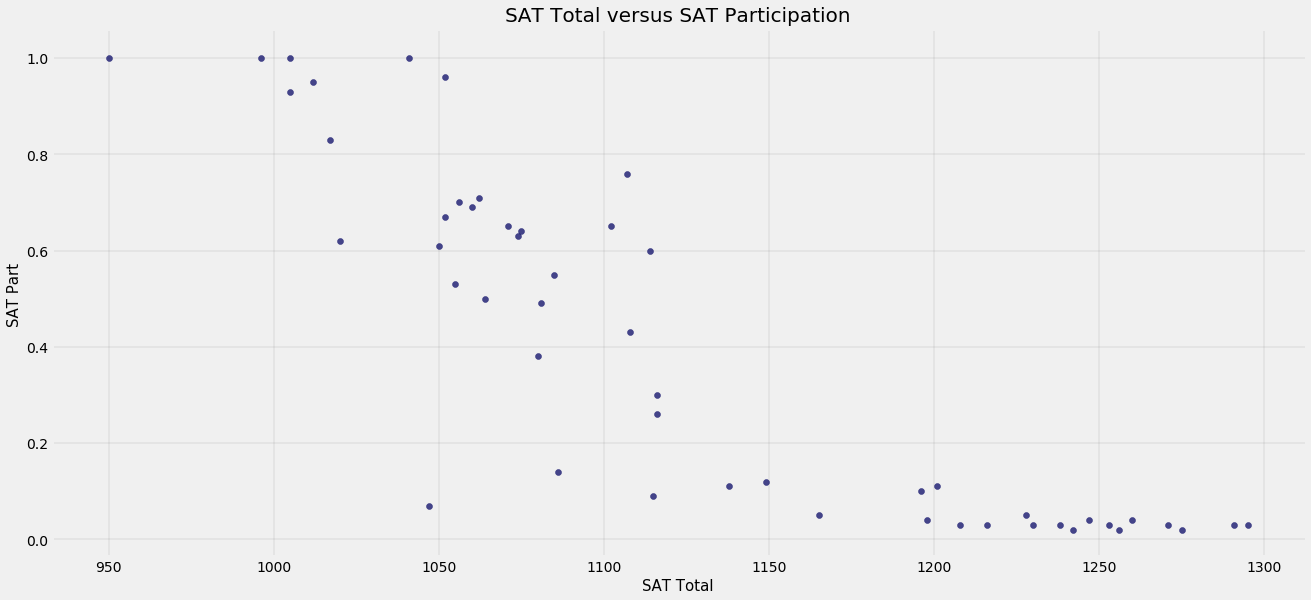

In [81]:
    fig, ax = plt.subplots(figsize=(20, 9))

    # Create scatter plot 
    plt.scatter(final['sat_total'],
                final['sat_part'],color=['midnightblue'],alpha=0.8);
    
    # title, xlabel and y label
    plt.title('SAT Total versus SAT Participation', fontsize = 20, pad=10)
    plt.ylabel('SAT Part', fontsize = 15)
    plt.xlabel('SAT Total', fontsize = 15);
    
    # removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)

### Inference

The two scatter charts above shows a distinctive relationship between participation rate and composite score. It was observed that the high composite scores mainly comes from the states with low participation.

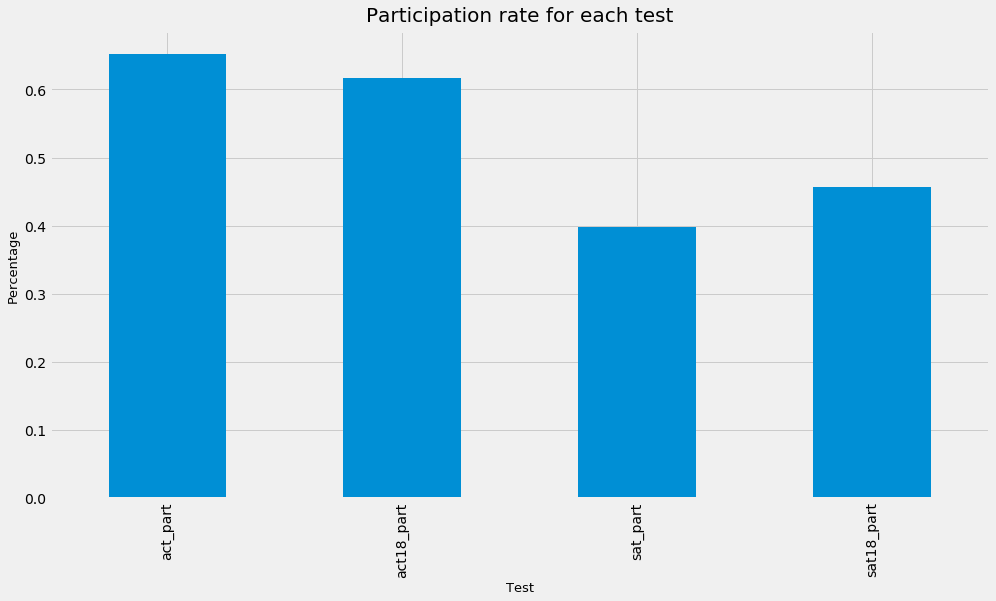

In [82]:
# Plot the mean of participation rate for each year 
final[['act_part','act18_part','sat_part','sat18_part']].mean().plot(kind='bar',figsize=(15,8));

# title, xlabel and y label
plt.title('Participation rate for each test',fontsize=20,pad=10)
plt.xlabel('Test',fontsize=13)
plt.ylabel('Percentage',fontsize=13);

### Inference

The bar chart above shows the participation rate for different test in 2017 and 2018. We can observe that there is a slight drop in participation rate for ACT from 2017 to 2018 while there is a significant increase in participation rate for SAT. It could probably mean that the high school graduates are more inclined to SAT. Hence it's worth investigating reason for the increase and decrease in participation rates.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![](image/act2017.png)

![](image/act2018.png)

![](image/sat2017.png)

![](image/sat2018.png)

![](image/act2017part.png)

![](image/act2018part.png)

![](image/sat2017part.png)

![](image/sat2018part.png)

### Inference

The rise in the SAT participation rate from 2017 to 2018 might be explained by the fact that more states make it mandatory for their graduates to take the SAT.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Participation rate**

From the subplot histograms plotted earlier, we can see that for SAT participation in both year are slightly right skewed/positive skewed and there is some spreading effect of the mode, median and mean. The mode of the SAT participation rates is at the far left where there is the highest observation (peak) of frequency, followed by median which is greater than mode and mean greater than the median as there is some extreme values on the right. It was observed that the greater the skewed, the greater the spreading effect of the mean, median and mode. 

As for the ACT participation we can see that it is left/negative skewed. As explained above, it means that the mode of the ACT participation rate is far right where the highest observation of frequency lies, followed by median which is lesser than mode and mean which is lesser than median as there is extreme values on the left.

**Math score**

The math score of both ACT and SAT for both year is right/positive skewed. It shows that the mean is greater than the median and the median is greater than mode and that tell us that for the math exam, majority of the students underperformed the national average score. 

**Reading/Verbal score**

Likewise for reading/verbal score of both ACT and SAT for both year is right/positive skewed. It also shows that the mean is greater than the median and the median is greater than mode (other than SAT 2018, which mode is greater than mean and median) and that tell us that for the math exam, majority of the students underperformed the national average score. 

**Total/Composite score**

Referring to the subplot histogram plotted below, the total/composite score of both ACT and SAT for both year is right/positive skewed. It also shows that the mean is greater than the median and the median is greater than mode. Similarly majority of the students underperformed the national average score, however it is shown that the 2018 graduates cohort that took the SAT exam fare poorer than the 2017 cohort as there are more underperformers. 

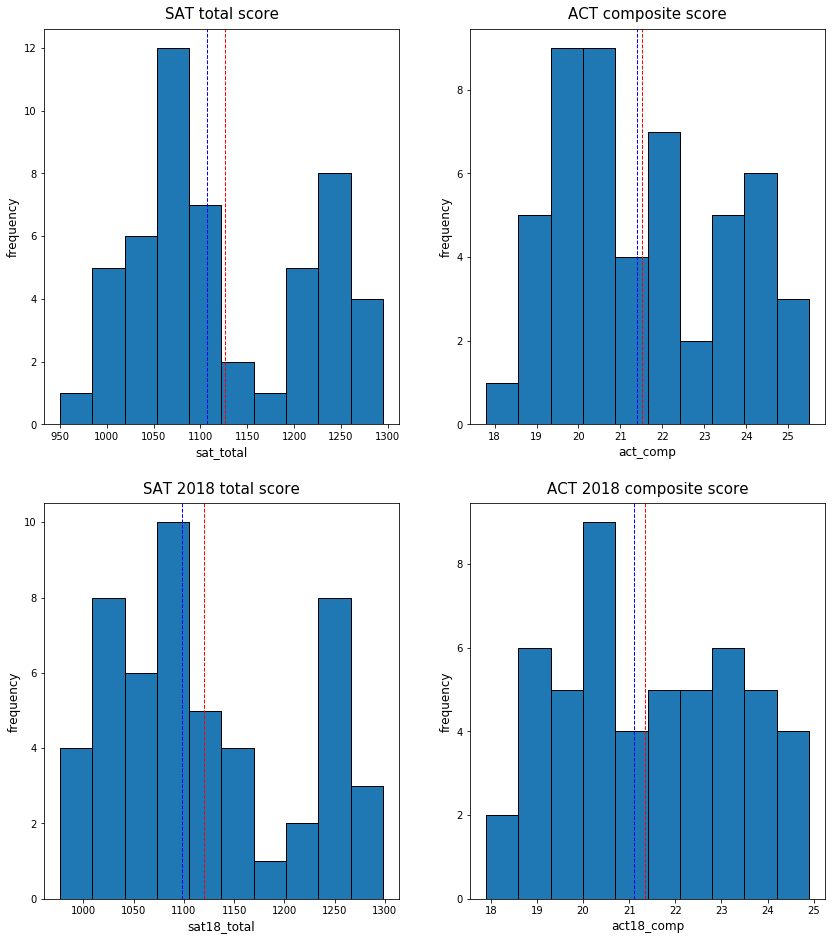

In [63]:
subplot_histograms(final,['sat_total','act_comp','sat18_total','act18_comp'],['SAT total score','ACT composite score','SAT 2018 total score','ACT 2018 composite score'],['sat_total','act_comp','sat18_total','act18_comp'])

### Inference

The change in mean and median for SAT 2017 and SAT 2018 compared to ACT shows that the sudden change in test (e.g. from ACT to SAT) impacted the total score due to the fact the state student has been following the specific test syllabus sincce they joined. Hence a change in test might be disadvantage to them as the subject and test framework might be different. 


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer**: 

Although according to the central limit theorem (CLT) that with a sample size of more than 30, the data will tend to normalise towards a normal distribution. However by looking at the histogram plotted above, with a sample size of 51, we can observe that the sample data is not normally distributed and the assumption holds for Math, Reading and Rates as well.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

***Answer:*** 

It doesn't make sense as the sample data is not normally distributed and any statistical inference from these data might not be accurate nor reliable. Reasons being could be in some states, students have the freedom to take both of the SAT and ACT test or the selection of the samples can be bias.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

***Answer***: 

No we cannot. 

Reason being there are other factors that may affect the scores such as time allocation for the exam, the way the exam is carried out (SAT separates math into calculator and non calculator categories), provision of Math formula reference guide and the emphasis of math concept (some tested more on algebra or geometry).

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

#### To  test if the change in SAT participation rate from 2017 to 2018 is significant

**𝐻0**:  The true mean difference in participation rate between SAT 2017 and SAT 2018 is 0.

**𝐻𝐴**: The true mean difference in participation rate between SAT 2017 and SAT 2018 is NOT 0.

In [64]:
# two separate vectors

sat_2017 = final['sat_part']
sat_2018 = final['sat18_part']

In [65]:
# Import scipy.stats
from scipy import stats

In [66]:
# Conduct our t-test.
stats.ttest_ind(sat_2017, sat_2018, equal_var=False)

Ttest_indResult(statistic=-0.8262650776952397, pvalue=0.4106269778595497)

**Conclusion**

Because our  𝑝 -value is greater than our  𝛼=0.05 , we fail to reject our null hypothesis. We do not have enough evidence to conclude that the mean participation rate differs between year 2017 and year 2018.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

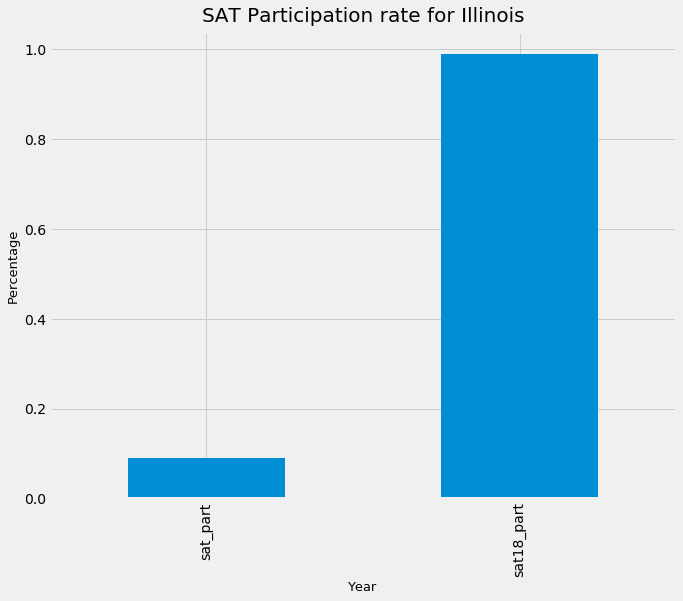

In [67]:
# resetting style
plt.style.use('fivethirtyeight')

#final.loc[final['state']=='Illinois',['sat_part','sat18_part']].plot(kind='bar',figsize=(12,8));
final.loc[13,['sat_part','sat18_part']].plot(kind='bar',figsize=(10,8));

# title, xlabel and y label
plt.title('SAT Participation rate for Illinois',fontsize=20,pad=10)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Percentage',fontsize=13);


### Inference

**(1) Illinois** 

The state SAT participation rate increase from 9% to 99% from 2017 to 2018. It could due to the reason that Illinois participated in the SAT School Day which the state gave the SAT to public school students for free. 

**Source**:
[SAT School Day](https://reports.collegeboard.org/archive/sat-suite-program-results/2018/sat-school-day)

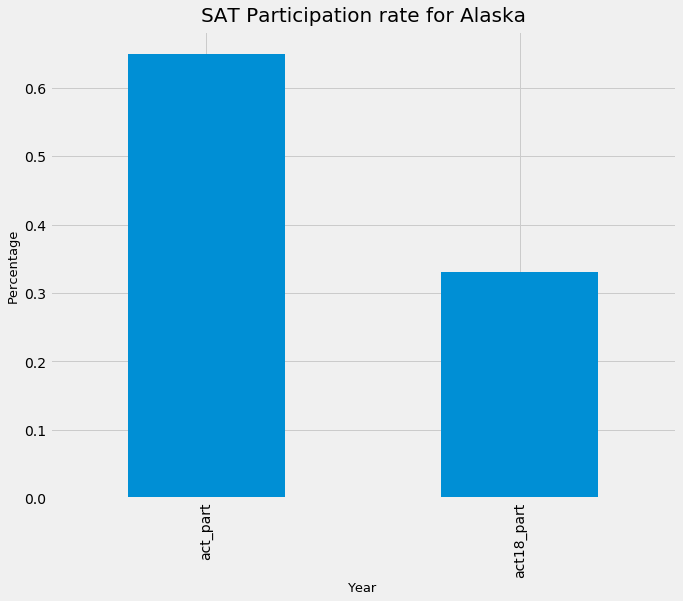

In [68]:
#final.loc[final['state']=='Illinois',['sat_part','sat18_part']].plot(kind='bar',figsize=(12,8));
final.loc[1,['act_part','act18_part']].plot(kind='bar',figsize=(10,8));

# title, xlabel and y label
plt.title('SAT Participation rate for Alaska',fontsize=20,pad=10)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Percentage',fontsize=13);

### Inference
**(2) Alaska** 

The state ACT rate dropped almost 50% from 2017 to 2018. One possible reason might be the introduction of the new version of SAT exam in 2016 and since then, the number of ACT test takers has actually declined. Reason being the new version of SAT has fewer sections and increased overall time allocated for the exam which means student might see it as an advantage over ACT. 

**Source**:
[New SAT vs Old SAT](https://blog.prepscholar.com/new-sat-vs-old-sat-quick-summary)

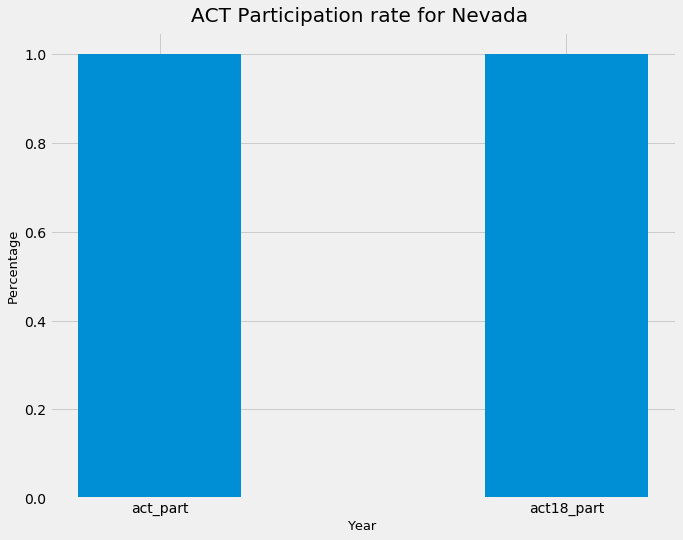

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(['act_part','act18_part'],final.loc[28,['act_part','act18_part']],width=0.4)

# title, xlabel and y label
plt.title('ACT Participation rate for Nevada ',fontsize=20,pad=10)
plt.xlabel('Year',fontsize=13)
plt.ylabel('Percentage',fontsize=13);

### Inference

**(3) Nevada** 

Since there are more possible reasons for students to take the SAT exam under the new version, However for states like Nevada still maintain a ACT participation rate of 100% for both years. The reason was due to the Nevada state making it mandatory for all students to take ACT exam before they graduate. 

**Source**:
[NEVADA Mandatory ACT Testing](https://www.reviewjournal.com/local/education/nevada-falls-to-last-among-states-with-mandatory-act-testing/)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

It has been observed the participation rate is greatly influenced by the state decisions to make either one of the standardized test a mandatory for high school graduates. By standardizing on one test, it is proven that the graduates score is much constant as students are more prepared for the test. In one of the analysis, the drop in mean and median score for SAT 2017 and SAT 2018 compared to ACT score shows that the sudden change in test (e.g. from ACT to SAT) impacted the graduate's total score. It might be due to the fact the state student has been following the specific test syllabus since they joined the school hence a change in test might be disadvantage to them as the subject and test framework might be different.

In order to increase the participation rates, the college board can consider incorporate both of the subject and test framework into the school syllabus itself so that graduates can be familiarize with the both test. With that they can allow the graduates to choose which test (or both) they are more comfortable or confident in, instead of restricting them to a mandatory one. In addition by eliminating barriers to the test, like subsidizing the test cost and offering the graduates greater flexibility to take the exams on weekdays and weekends, graduates that are less fortunate will be able to participate in any of the test. 
